In [3]:
# -----------------------------------------------------
# Auhor: Timur Abdualimov, ATP
# Competition: MKB 
# First date code: 11.11.2021
# Used: Jupyter Notebook, GPU
# -----------------------------------------------------

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import scikitplot as skplt

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, TrueNegatives, TruePositives, FalseNegatives, FalsePositives
from tensorflow.keras.optimizers import Adam, Adamax, Nadam

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv('data_prepared_to_AI_11')
test = pd.read_csv('test_dataset_hackathon_mkb.csv', sep=';', encoding='cp1251')

In [3]:
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)
test_data = test_data.drop(['TARGET'], axis=1)

y = train_data['TARGET'].values            # наш таргет
X = train_data.drop(['TARGET'], axis=1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [4]:
# robust = RobustScaler().fit(X)
# X = pd.DataFrame(robust.transform(X), columns = X.columns)
# test_data = pd.DataFrame(robust.transform(test_data), columns = test_data.columns) 

In [5]:
# # инициализация KFold с 5тью фолдами
# cv = KFold(n_splits=5, random_state=42, shuffle=True)
 
# classifiers = []
# # метод split возвращает индексы для объектов train и test
# for train_index, test_index in cv.split(train_data['TARGET']):
#     #clf = CatBoostClassifier(random_state=42, iterations=200, verbose=0, learning_rate=0.1, eval_metric='AUC')
#     RF = RandomForestClassifier(n_estimators=300, max_depth=39, n_jobs=-1, random_state=0)
#     #extra_tree = ExtraTreeClassifier(random_state=0)
#     #neigh = KNeighborsClassifier(n_neighbors=3)
#     #XGB = XGBClassifier(use_label_encoder =False, eval_metric='mlogloss')
#     #GBCl = GradientBoostingClassifier()
    
    
    
#     X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
#     y_train, y_test = train_data['TARGET'][train_index], train_data['TARGET'][test_index]
    
#     #clf.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)
#     RF.fit(X_train, y_train)
#     #BC = BaggingClassifier(clf, random_state=13, n_jobs=-1).fit(X_train, y_train)
#     #ETREE = extra_tree.fit(X_train, y_train)
#    # neigh_ = neigh.fit(X_train, y_train)
#     #XGB_ = XGB.fit(X_train, y_train)
#     #GBCl_ = GBCl.fit(X_train, y_train)
    
#     #print('BaggingClassifier: ', roc_auc_score(y_test, BC.predict(X_test)))
#     #print('CatBoostClassifier ', roc_auc_score(y_test, clf.predict(X_test)))
#     print('RandomForestClassifier ', roc_auc_score(y_test, RF.predict(X_test)))
#     #print('ExtraTreeClassifier ', roc_auc_score(y_test, ETREE.predict(X_test)))
#     #print('KNeighborsClassifier ', roc_auc_score(y_test, neigh_.predict(X_test)))
#     #print('XGB ', roc_auc_score(y_test, XGB_.predict(X_test)))
#     #print('GradientBoostingClassifier ', roc_auc_score(y_test, GBCl_.predict(X_test)))
    
#     print('')
 
#     # получим 5 оптимальных классификаторов
#     classifiers.append(clf)

In [6]:
train_data_y = pd.get_dummies(train_data, prefix='', prefix_sep='', columns=['TARGET'])[['0', '1']]

In [7]:
X.shape

(17891, 2001)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
data_train = scaler.transform(X)
data_test = scaler.transform(test_data)
#X_train, (X_test), y_train, y_test = train_test_split(data_train, train_data_y, test_size=0.2, random_state=13)
X_train, X_test, y_train, y_test = data_train[:14000,], data_train[14000:,], train_data_y.values[:14000,], train_data_y.values[14000:,]

tf.keras.backend.clear_session()

input_ = Input(shape=(2001,), name = "Input_")
x = Dense(64, activation="elu")(input_)
x = Dense(32, activation="elu")(x)
predictions = Dense(2, activation ='softmax')(x)

mod = Model(inputs=input_, outputs=predictions)

mod.compile(optimizer=Adam(learning_rate = 0.00001), loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
mod.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_ (InputLayer)         [(None, 2001)]            0         
                                                                 
 dense (Dense)               (None, 64)                128128    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 130,274
Trainable params: 130,274
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = mod.fit( 
    data_train, train_data_y,
    validation_split = 0.1,
    epochs=47, verbose=1, shuffle=False)

Epoch 1/47
504/504 [==============================] - 2s 3ms/step - loss: 0.6572 - accuracy: 0.6138 - auc: 0.6584 - val_loss: 0.5930 - val_accuracy: 0.6547 - val_auc: 0.7759
Epoch 2/47
504/504 [==============================] - 1s 2ms/step - loss: 0.5918 - accuracy: 0.6996 - auc: 0.7760 - val_loss: 0.5389 - val_accuracy: 0.7212 - val_auc: 0.8267
Epoch 3/47
504/504 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7309 - auc: 0.8112 - val_loss: 0.5047 - val_accuracy: 0.7570 - val_auc: 0.8550
Epoch 4/47
504/504 [==============================] - 1s 2ms/step - loss: 0.5310 - accuracy: 0.7450 - auc: 0.8289 - val_loss: 0.4811 - val_accuracy: 0.7687 - val_auc: 0.8709
Epoch 5/47
504/504 [==============================] - 1s 2ms/step - loss: 0.5116 - accuracy: 0.7599 - auc: 0.8428 - val_loss: 0.4629 - val_accuracy: 0.7832 - val_auc: 0.8814
Epoch 6/47
504/504 [==============================] - 1s 2ms/step - loss: 0.4947 - accuracy: 0.7721 - auc: 0.8549 - val_loss: 0.44

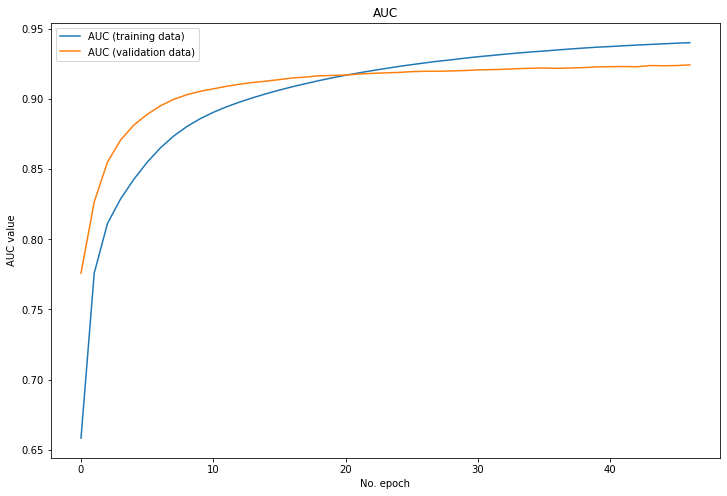

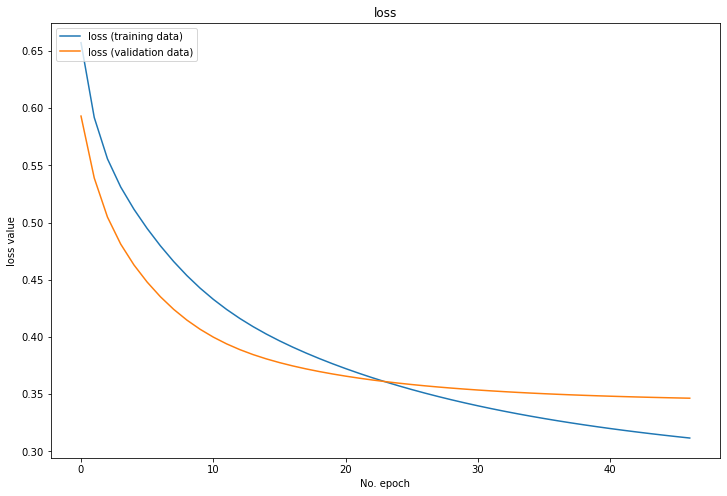

In [10]:
plt.plot(history.history['auc'], label='AUC (training data)')
plt.plot(history.history['val_auc'], label='AUC (validation data)')
plt.title('AUC')
plt.ylabel('AUC value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='loss (training data)')
plt.plot(history.history['val_loss'], label='loss (validation data)')
plt.title('loss')
plt.ylabel('loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

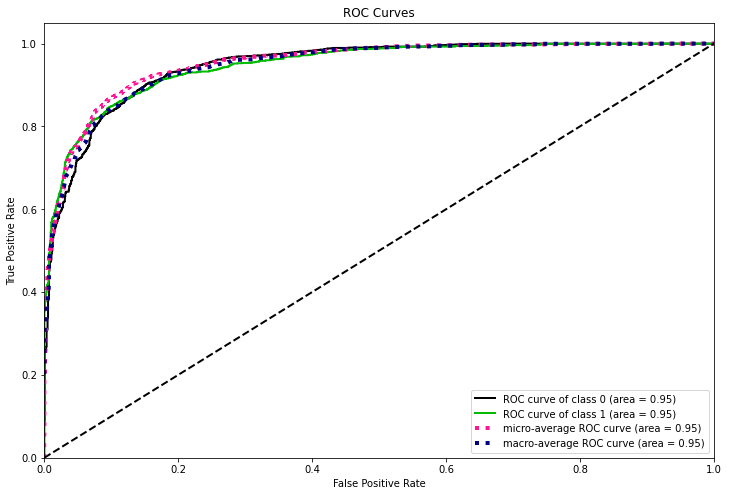

In [11]:
skplt.metrics.plot_roc(y_test[:, -1], mod.predict(X_test))
plt.show()

In [12]:
test_pred = mod.predict(X_test)


fpr, tpr, _ = roc_curve(y_test[:,-1], test_pred[:,1])
auc = roc_auc_score(y_test[:,  -1], test_pred[:, 1])
accuracy = accuracy_score(y_test[:, -1], np.argmax(test_pred, axis = -1))
f1 = f1_score(y_test[:, -1], np.argmax(test_pred, axis = -1))
precision =  precision_score(y_test[:, -1], np.argmax(test_pred, axis = -1))
recall = recall_score(y_test[:, -1], np.argmax(test_pred, axis = -1))

print('FP, TP              :', "%0.2f" % sum(fpr), "%0.2f" % sum(tpr))
print('ROC_AUC_SCORE       :', "%0.2f" % auc)
print('accuracy            :', "%0.2f" % accuracy)
print('precision           :', "%0.2f" % precision)
print('recall              :', "%0.2f" % recall)
print('f1                  :', "%0.2f" % f1)

FP, TP              : 117.71 587.57
ROC_AUC_SCORE       : 0.95
accuracy            : 0.88
precision           : 0.88
recall              : 0.78
f1                  : 0.83


In [13]:
confusion_matrix(y_test[:, -1], np.argmax(test_pred, axis = -1))

array([[2350,  147],
       [ 308, 1086]])

In [15]:
roc_auc_score(y_test[:, -1], np.argmax(test_pred, axis = -1))

0.8600912199373825

In [105]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

In [106]:
# roc_auc_score(y_test, RF.predict_proba(X_test)[:, 1])

In [107]:
# roc_auc_score(y_test, BC.predict(X_test))

In [17]:
test['TARGET'] = mod.predict(data_test)[:,1]
test[['id_contract', 'TARGET']].to_csv('submit_file_AI.csv', sep=';', index=False)
test[['id_contract', 'TARGET']].head()

,id_contract,TARGET
0,17892,0.000238
1,17893,0.004135
2,17894,0.016129
3,17895,0.392880
4,17896,0.076546
